## Problem Statement : 

HELP International provide the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. CEO of the NGO want to categorise the countries using socio-economic and health factors that determine the overall development of the country and we need to suggest the countries which the NGO needs to focus on the most.

**Approach**<br>
To analyze and present the clusters(cluster the countries by the factors mentioned) by performing k-means clustering for different values of k (number of clusters) and Hierarchical Clustering for single linkage and complete linkage and provide the NGO with the list of countries which are need for direst aid.

Steps:
1. Data Quality Check and cleaning
2. Exploratory data analysis
3. Outlier Analysis
4. Scaling
5. Modelling using K-Means and Hierarchical clustering
5. Final analysis and recommendations

In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale the data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# For silhouette score
from sklearn.metrics import silhouette_score

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# reading the data file
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Quality Check

In [3]:
# shape
data.shape

(167, 10)

In [4]:
# info (checking for null values and data types of the variables)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# checking for repeated countires in the given data
len(list(data['country'].unique()))

167

In [6]:
# summary
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# converting exports, health, imports columns
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [8]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### EDA

#### Univariate Analysis

In [9]:
col = list(data.columns)
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [10]:
# numeric columns
col = col[1:10]
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

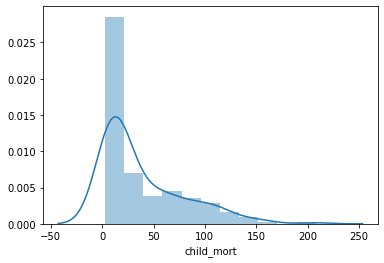

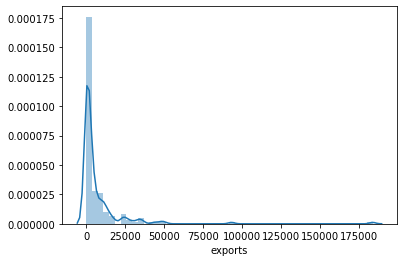

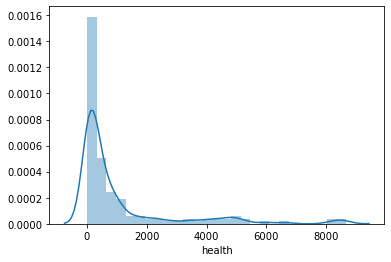

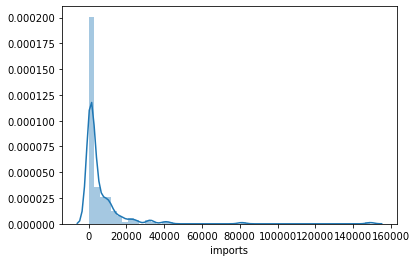

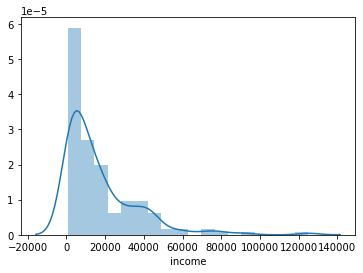

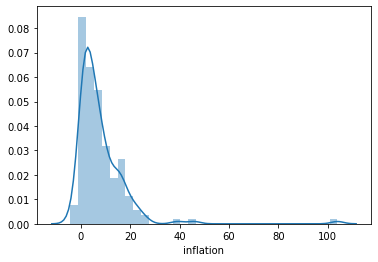

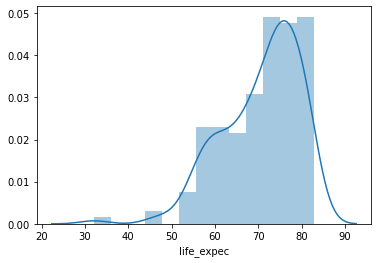

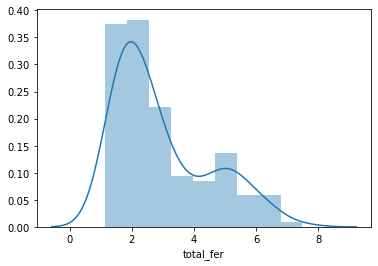

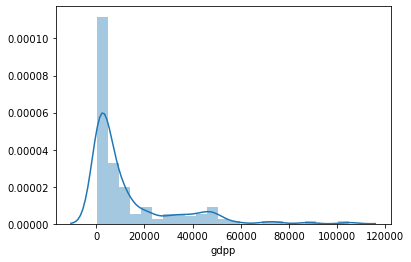

In [11]:
# distribution of columns
for c in col:
    sns.distplot(data[c])
    plt.show();

Inferences :
1. child_mort , exports, health , imports, inflation are normally distributed which means that there are lesser chances for any internal grouping.
2. Income, total_fer, life_expec are slightly in bimodal distribution which means that there may are higher chances for internal grouping.

#### Bivariate analysis

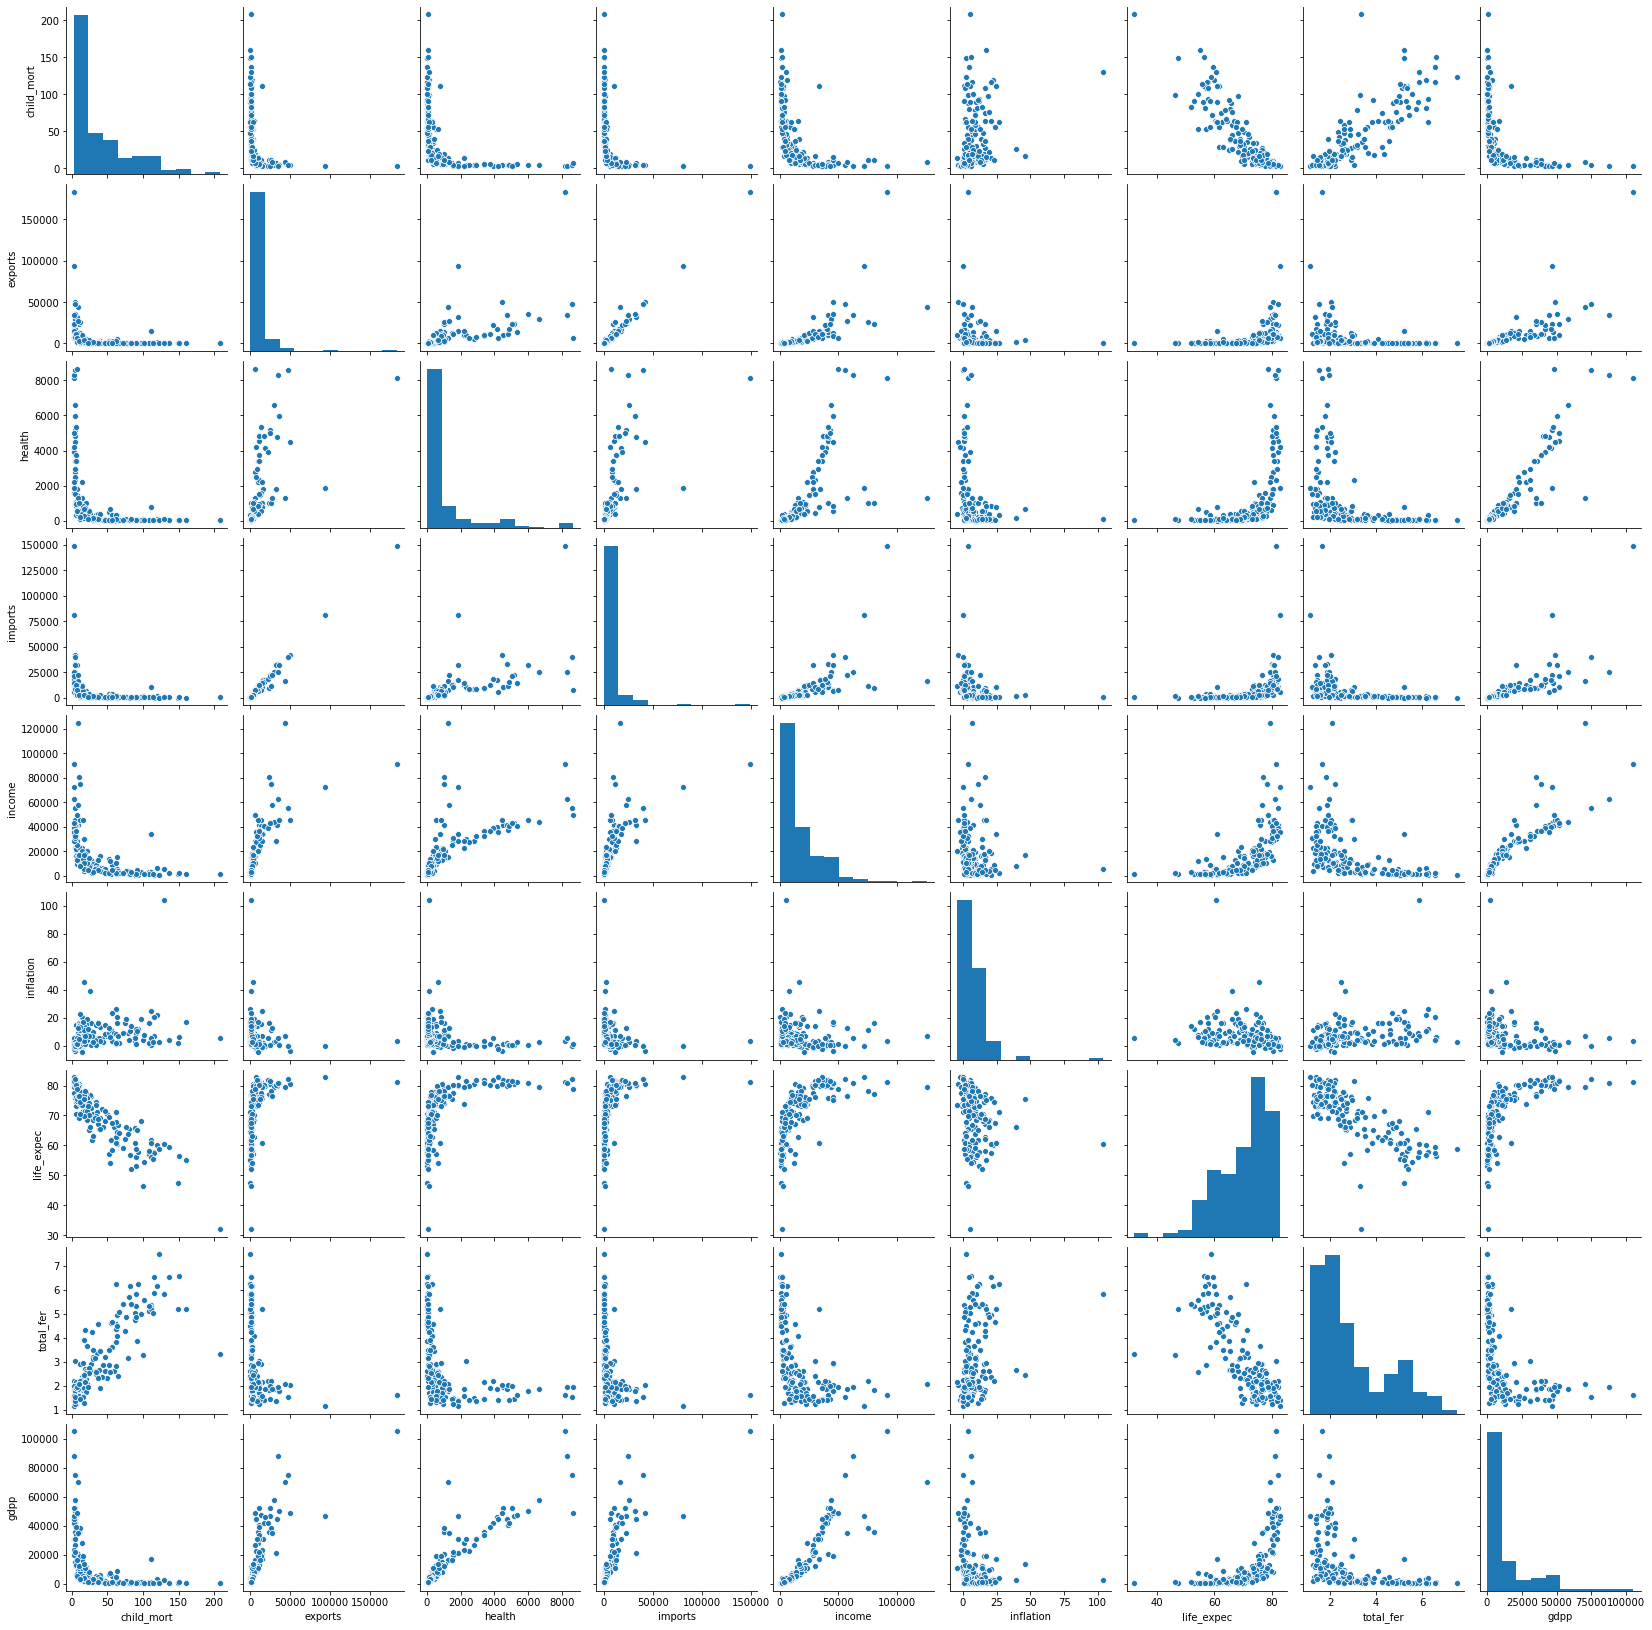

In [12]:

sns.pairplot(data = data, vars = col)
plt.show()

Inferences : 
1. gdpp-health , gdpp-income shows linear relation 
2. gdpp-exports, gdpp-imports shows similar trend
3. Increase in exports leads to increase in imports

#### Multivariate analysis

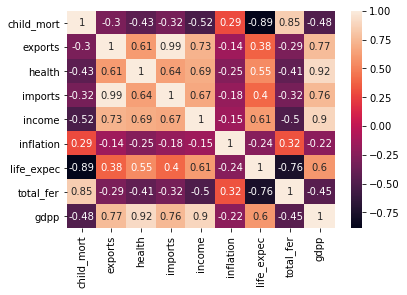

In [13]:
# correlation between the columns
sns.heatmap(data[col].corr(), annot=True);

Inferences :
1. child_mort and total_fer has positive higher corr and child_mort is negatively correlated with life_expec
2. exports and imports have highest correlation amaong all other varibles
3. gdpp and income has high corr
4. Inflation is not much correlated with any of the variables.

### Outlier Analysis

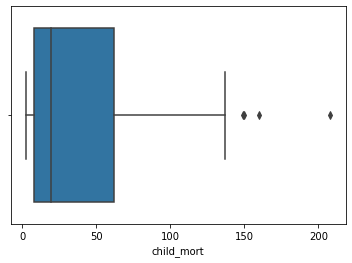

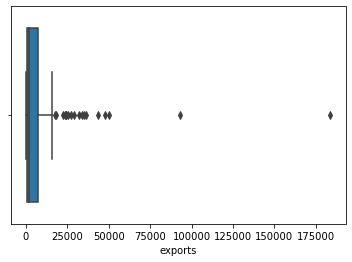

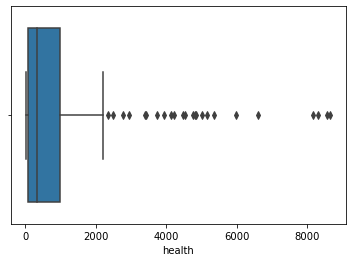

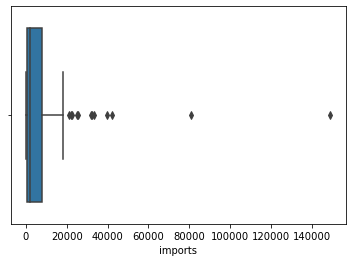

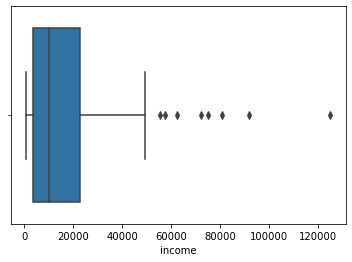

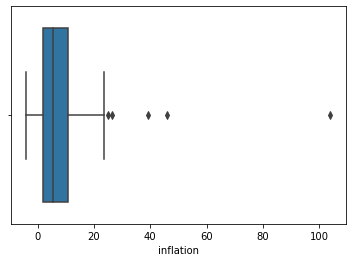

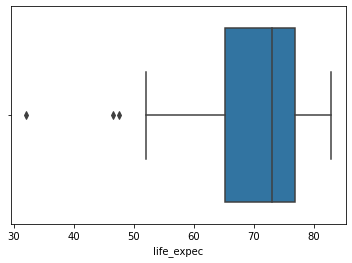

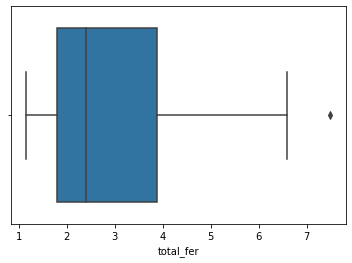

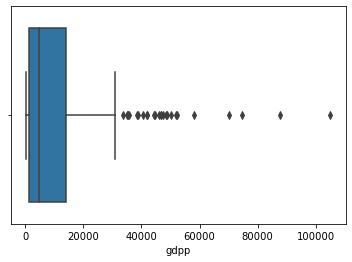

In [14]:
for c in col:
    sns.boxplot(data[c])
    plt.show();

Inferences:
1. 'child_mort', 'inflation', 'total_fert' has upper range outliers but we are not treating them as they are important to identify the dire countries.
2. Only 'life_expec' has lower range outliers but we are not treating them because it helps to identify the dire countires.
3. 'gdpp' , 'income', 'imports', 'health', 'exports' have upper range outliers and we can deal with Soft Capping.

In [15]:
# gdpp' , 'income', 'imports', 'health', 'exports' have upper range outliers and we can deal with Soft Capping.

q1 = data['gdpp'].quantile(0.99)
data['gdpp'][data['gdpp']>=q1] = q1

In [16]:
q2 = data['income'].quantile(0.99)
data['income'][data['income']>=q2] = q2

In [17]:
q3 = data['imports'].quantile(0.99)
data['imports'][data['imports']>=q3] = q3

In [18]:
q4 = data['health'].quantile(0.97)
data['health'][data['health']>=q4] = q4

In [19]:
q5 = data['exports'].quantile(0.99)
data['exports'][data['exports']>=q5] = q5

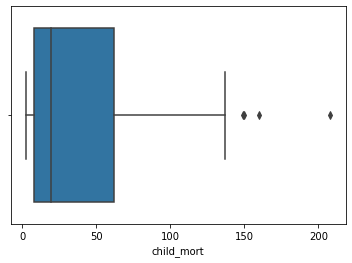

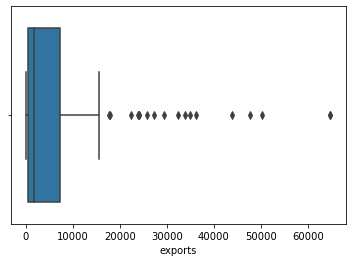

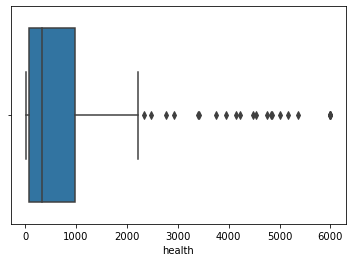

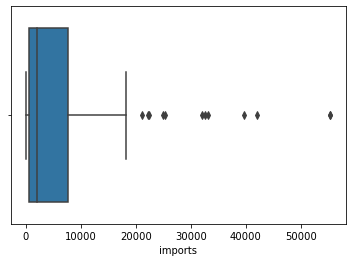

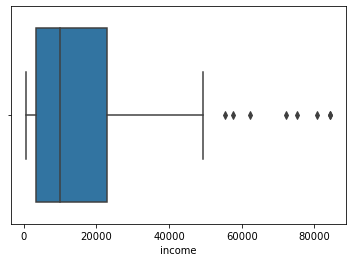

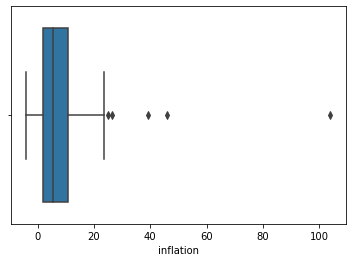

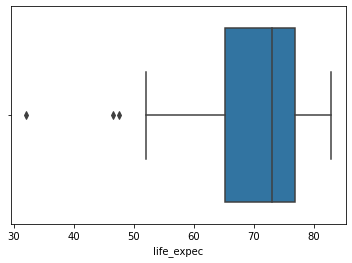

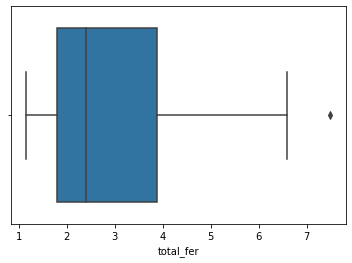

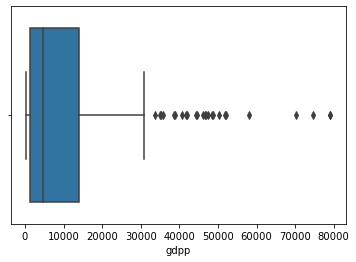

In [20]:
for c in col:
    sns.boxplot(data[c])
    plt.show();

#### Hopkins statistic

In [21]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [22]:
hopkins(data.drop('country', axis=1))

0.9138045131452975

As we got a good hopkins value which means the dataset is different from randomly scattered data, the clustering can be done more accurately .

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
data_scaled = StandardScaler().fit_transform(data.drop('country', axis=1))

In [24]:
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-0.569622,-0.606962,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.463018,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.515195,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.569579,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.165059,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


In [25]:
data_scaled.columns = ['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.606962,-0.598741,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.463018,-0.413584,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.515195,-0.476100,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.569579,-0.463973,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.165059,0.139728,0.125254,-0.601749,0.704258,-0.541946,-0.032042


### K-Means Clustering

In [26]:
# k-means with some arbitrary k
kmeans4 = KMeans(n_clusters=4, max_iter=50, random_state=0)
kmeans4.fit(data_scaled)

KMeans(max_iter=50, n_clusters=4, random_state=0)

In [27]:
kmeans4.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 3, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 3, 3, 1, 1, 3, 3, 0, 0, 1, 0, 3, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1])

In [28]:
data['K4_labels'] = kmeans4.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K4_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [29]:
data['K4_labels'].value_counts()

0    82
1    48
3    28
2     9
Name: K4_labels, dtype: int64

#### Visualizing 'gdpp' , 'income', 'child_mort' using scatterplot

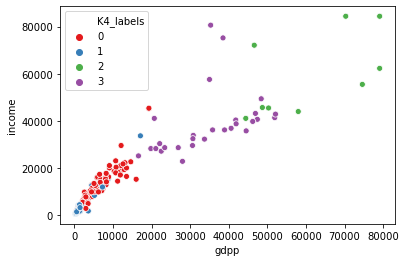

In [30]:
sns.scatterplot(x='gdpp', y='income', hue= 'K4_labels', data=data, palette='Set1')

Inferences:
    * low income and low gdpp are grouped into cluster 0 and 1
    * cluster 2 and cluster 3 has high income and gdpp

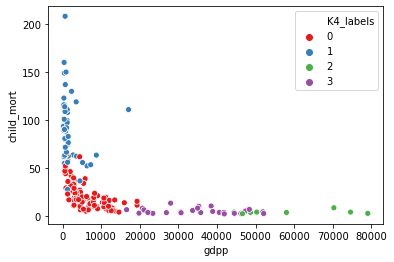

In [31]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'K4_labels', data=data, palette='Set1')

Inferences:
    * low child_mort and low gdpp are grouped to cluster 0 
    * high child_mort and low gdpp are grouped to cluster 1
    * cluster 2 and 3 has low child_mort and high gdpp

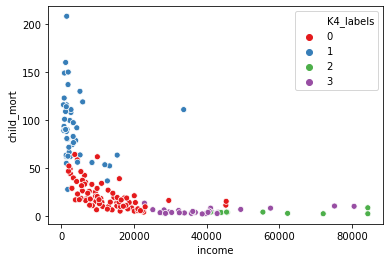

In [32]:
sns.scatterplot(x='income', y='child_mort', hue= 'K4_labels', data=data, palette='Set1')

Inferences:
    * low child_mort and low income are grouped to cluster 0 
    * high child_mort and low income are grouped to cluster 1
    * cluster 2 and 3 has low child_mort and high income

#### Cluster profiling

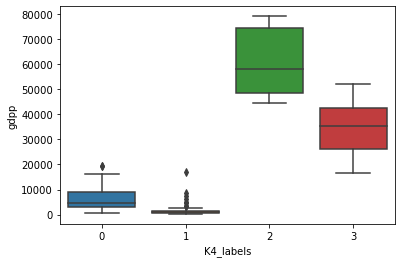

In [33]:
sns.boxplot(x='K4_labels', y='gdpp', data=data)

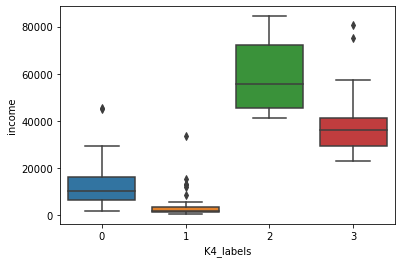

In [34]:
sns.boxplot(x='K4_labels', y='income', data=data)

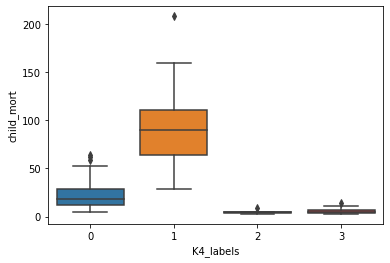

In [35]:
sns.boxplot(x='K4_labels', y='child_mort', data=data)

Inferences : 
Cluster = 1 has LOW GDPP, LOW INCOME and HIGH CHILD_MORT.
Cluster 0 and 1 shows the similar trends.

#### Finding the optimal number of clusters

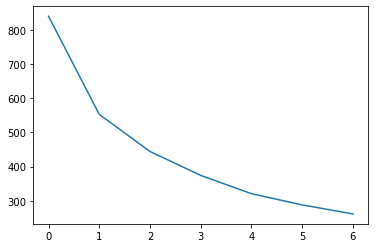

In [36]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

#### Silhouette Analysis

In [37]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48345810581734744
For n_clusters=3, the silhouette score is 0.42355450020426055
For n_clusters=4, the silhouette score is 0.41216373307921195
For n_clusters=5, the silhouette score is 0.4172328440594549
For n_clusters=6, the silhouette score is 0.284463882474192
For n_clusters=7, the silhouette score is 0.29537652929801195
For n_clusters=8, the silhouette score is 0.2536849803188804


#### Performing the K-Means analysis

* From the elbow-curve and the silhouette score, I choose K = 3. Highest silhouette score is for clsuters = 2 but it is not recommended in the business decisions, so selecting the next highest i.e k = 3.
* Initially k = 4 is choosen but then, two clusters are very similar, so going with k = 3.

In [38]:
# final model with k = 3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=0)
kmeans.fit(data_scaled)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [39]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [40]:
#assigning labels to data frame
data['labels'] = kmeans.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K4_labels,labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0


In [41]:
data['labels'].value_counts()

0    90
2    48
1    29
Name: labels, dtype: int64

#### Visualizing 'gdpp' , 'income', 'child_mort' using scatterplot

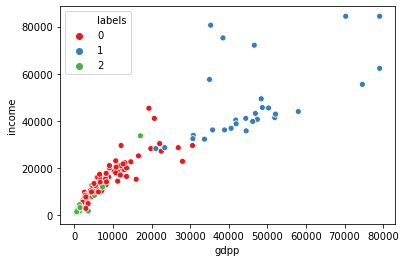

In [42]:
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=data, palette='Set1')

Inferences:
    * low income and low gdpp are grouped into cluster 0 and 2
    * cluster 1 has high income and gdpp

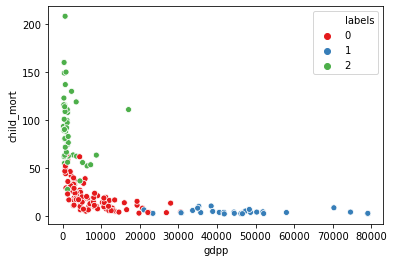

In [43]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'labels', data=data, palette='Set1')

Inferences:
    * low child_mort and low gdpp are grouped to cluster 0 
    * high child_mort and low gdpp are grouped to cluster 2
    * cluster 1 has low child_mort and high gdpp

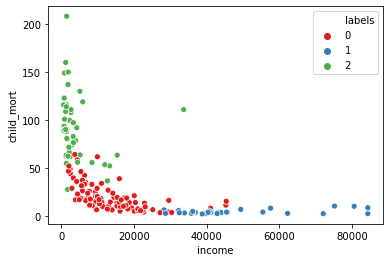

In [44]:
sns.scatterplot(x='income', y='child_mort', hue= 'labels', data=data, palette='Set1')

Inferences:
    * low child_mort and low income are grouped to cluster 0 
    * high child_mort and low income are grouped to cluster 2
    * cluster 1 has low child_mort and high income

#### Cluster profiling

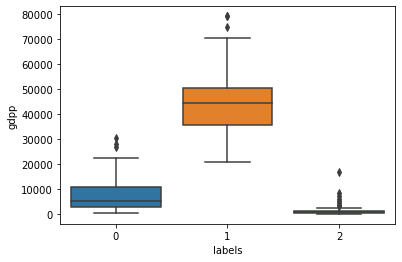

In [45]:
sns.boxplot(x='labels', y='gdpp', data=data)

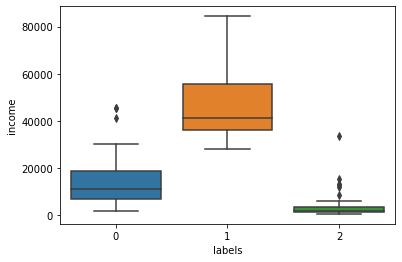

In [46]:
sns.boxplot(x='labels', y='income', data=data)

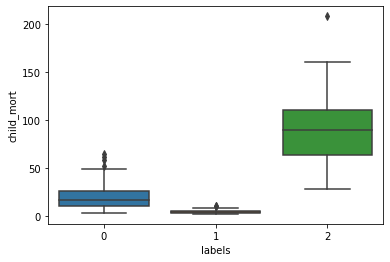

In [47]:
sns.boxplot(x='labels', y='child_mort', data=data)

Inferences : 
Cluster = 2 has LOW GDPP, LOW INCOME and HIGH CHILD_MORT. Hence, countries falling in cluster 2 are in dire need of aid.

In [48]:
# exracting clsuter 2 in separate data frame
cluster2 = data[data['labels']==2]

In [49]:
cluster2['labels'].value_counts()

2    48
Name: labels, dtype: int64

In [50]:
cluster2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K4_labels,labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1,2


In [51]:
# sorting them, to find the most important countries to be considered
cluster2.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K4_labels,labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,1,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,1,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,1,2


### Hierarchical Clustering

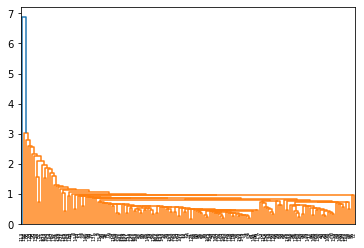

In [52]:
# single linkage
mergings_single = linkage(data_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

Single linkage has no better form of the clusters, so considering complete linkage method for Hierarchical Clustering

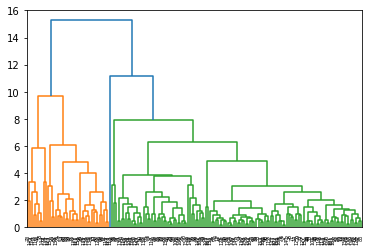

In [53]:
# complete linkage
mergings_complete = linkage(data_scaled, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

##### Initially taking no. of clusters = 3 

In [54]:
cluster_labels_3 = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [55]:
data['cluster_labels_3'] = cluster_labels_3
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K4_labels,labels,cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0


In [56]:
data['cluster_labels_3'].value_counts()

0    125
1     41
2      1
Name: cluster_labels_3, dtype: int64

#### Cluster profiling

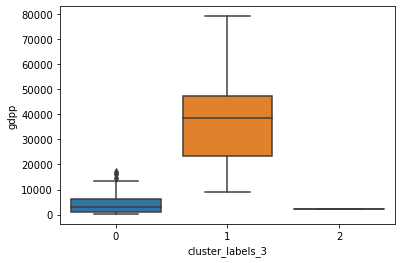

In [57]:
sns.boxplot(x='cluster_labels_3', y='gdpp', data=data)

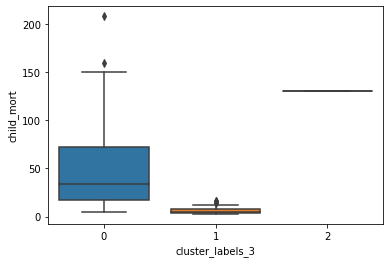

In [58]:

sns.boxplot(x='cluster_labels_3', y='child_mort', data=data)

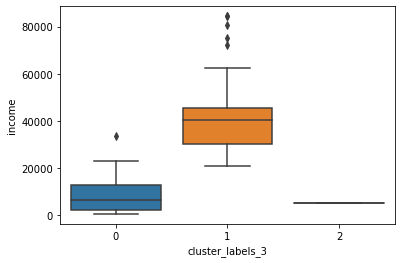

In [59]:
sns.boxplot(x='cluster_labels_3', y='income', data=data)

Inferences : n_clusters = 3 doesn't gave a good output, it grouped the data completely into 2 clusters and third one has only one data point. Almost 75 percent of the data is taken under cluster = 0.

So ,Considering no.of clusters = 4 to cut the tree

In [60]:
# Final model with 4 clusters (complete linkage)
cluster_labels = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 3, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [61]:
# assigning labels to data frame
data['cluster_labels'] = cluster_labels
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K4_labels,labels,cluster_labels_3,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,2,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,2,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,0,0


#### Visualizing 'gdpp' , 'income', 'child_mort' using scatterplot

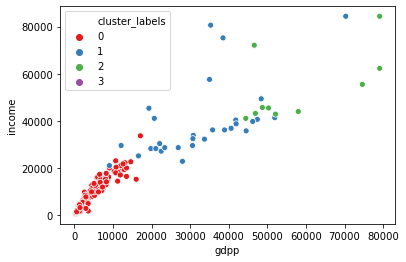

In [62]:
sns.scatterplot(x='gdpp', y='income', hue= 'cluster_labels', data=data, palette='Set1')

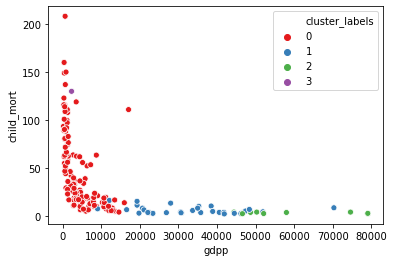

In [63]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster_labels', data=data, palette='Set1')

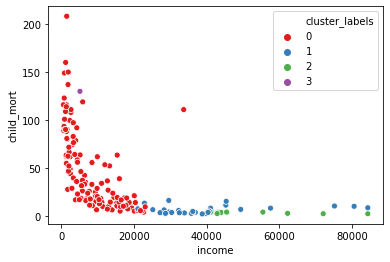

In [64]:
sns.scatterplot(x='income', y='child_mort', hue= 'cluster_labels', data=data, palette='Set1')

#### Cluster profiling

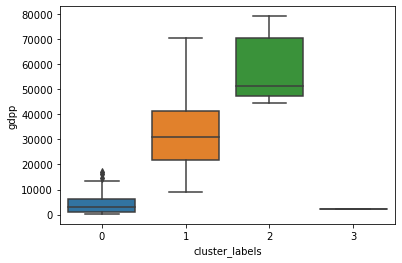

In [65]:
sns.boxplot(x='cluster_labels', y='gdpp', data=data)

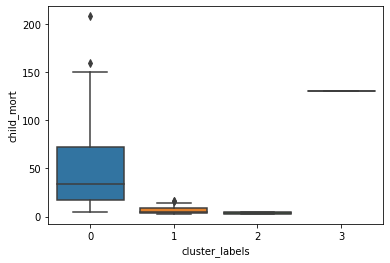

In [66]:

sns.boxplot(x='cluster_labels', y='child_mort', data=data)

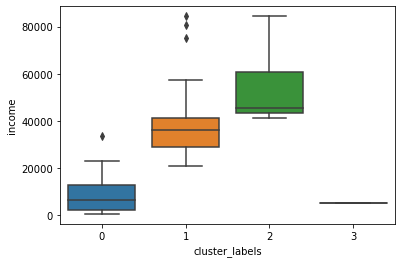

In [67]:
sns.boxplot(x='cluster_labels', y='income', data=data)

Inferences : Cluster = 0 has LOW GDPP, LOW INCOME and HIGH CHILD_MORT. Hence, countries falling in cluster 0 are in dire need of aid.

In [68]:
data['cluster_labels'].value_counts()

0    125
1     31
2     10
3      1
Name: cluster_labels, dtype: int64

In [69]:
# extracting cluster0 to dataframe
cluster_labels0 = data[data['cluster_labels']==0]

In [70]:
# sorting them, to find the most important countries to be considered
cluster_labels0.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K4_labels,labels,cluster_labels_3,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1,2,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1,2,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1,2,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1,2,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1,2,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,1,2,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1,2,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,1,2,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,1,2,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,1,2,0,0


### Final list of countries

* While performing both K-means(no. of clusters taken = 3) and Hierarchical analysis(no. of clusters taken = 4) have given different results. 
* K-means algorithm has divided the data into Cluster 0 - 90, Cluster 1 - 29 , Cluster 2 - 48 where Cluster 2 shows LOW GDPP, LOW INCOME and HIGH CHILD_MORT.
* Hierarchical algorithm has divided the data into Cluster 0 - 125, Cluster 1 - 31, Cluster 2 - 10, Cluster 3 - 1 where Cluster 0 shows LOW GDPP, LOW INCOME and HIGH CHILD_MORT.
* But Hierarchical algorithm took 75% of the countries into Cluster 0, so considering K-means algorithm to get the final list of countries.
* Even though results differ to both algorithms, top 10 countries list came out to be same.

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea